In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load & Explore the Dataset

1.load the dataset(csv or json)

In [ ]:
df1=pd.read_csv('/content/reviews_data/reviews_badminton/data.csv')
df2=pd.read_csv('/content/reviews_data/reviews_tawa/data.csv')
df3=pd.read_csv('/content/reviews_data/reviews_tea/data.csv')

print(df1.shape)
print(df2.shape)
print(df3.shape)

(8518, 8)
(2531, 8)
(9170, 8)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer_Name    2531 non-null   object 
 1   Reviewer_Rating  2285 non-null   float64
 2   Review_Title     2531 non-null   object 
 3   Review_Text      2531 non-null   object 
 4   Place_of_Review  2531 non-null   object 
 5   Date_of_Review   2531 non-null   object 
 6   Up_Votes         2531 non-null   int64  
 7   Down_Votes       2531 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 158.3+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9170 entries, 0 to 9169
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewer_name    9170 non-null   object
 1   reviewer_rating  9170 non-null   int64 
 2   review_title     9170 non-null   object
 3   review_text      9170 non-null   object
 4   place_of_review  9170 non-null   object
 5   Date_of_review   9170 non-null   object
 6   up_votes         9170 non-null   int64 
 7   Down_votes       9170 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 573.3+ KB


In [ ]:
df1=df1[['Review Title','Review text','Ratings']]
df2=df2[['Review_Title','Review_Text','Reviewer_Rating']]
df3=df3[['review_title','review_text','reviewer_rating']]

In [ ]:
df1 = df1.rename(columns={
    'Review Title': 'review_title',
    'Review text': 'review_text',
    'Ratings': 'rating'
})

df2 = df2.rename(columns={
    'Review_Title': 'review_title',
    'Review_Text': 'review_text',
    'Reviewer_Rating': 'rating'
})

df3 = df3.rename(columns={
    'reviewer_rating': 'rating'
})


In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,review_title,review_text,rating
0,Nice product,"Nice product, good quality, but price is now r...",4.0
1,Don't waste your money,They didn't supplied Yonex Mavis 350. Outside ...,1.0
2,Did not meet expectations,Worst product. Damaged shuttlecocks packed in ...,1.0
3,Fair,"Quite O. K. , but nowadays the quality of the...",3.0
4,Over priced,Over pricedJust â?¹620 ..from retailer.I didn'...,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20219 entries, 0 to 20218
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_title  20209 non-null  object 
 1   review_text   20211 non-null  object 
 2   rating        19973 non-null  float64
dtypes: float64(1), object(2)
memory usage: 474.0+ KB


In [ ]:
df.isnull().sum()

,0
review_title,10
review_text,8
rating,246


In [ ]:
# 1. Fill non-critical text
df['review_title'] = df['review_title'].fillna('')

# 2. Drop rows without review text
df = df.dropna(subset=['review_text'])

# 3. Drop rows without rating
df = df.dropna(subset=['rating'])

In [ ]:
df = df[df['rating'] != 3]

df['sentiment'] = df['rating'].apply(
    lambda x: 1 if x >= 4 else 0
)

In [ ]:
df.isnull().sum()

,0
review_title,0
review_text,0
rating,0
sentiment,0


In [ ]:
df["combined_text"] = df["review_title"] + " " + df["review_text"]

In [ ]:
import nltk
import re
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean(doc):
  # doc is a string of text
  # Lets's define a regex to match special characters and digits
  regx="[^a-zA-Z\s]"
  doc=re.sub(regx," ",doc)
  # Convert to lowercase
  doc=doc.lower()
  # Tokenization
  token=nltk.word_tokenize(doc)
  # Stop word removal
  stop_words=set(stopwords.words('english'))
  filtered_tokens=[i for i in token if i not in stop_words]
  # Lemmatize
  lemmatizer=WordNetLemmatizer()
  lemmatized_tokens=[lemmatizer.lemmatize(i) for i in filtered_tokens]
  return " ".join(lemmatized_tokens)

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3026300792.py:13: SyntaxWarning: invalid escape sequence '\s'
  regx="[^a-zA-Z\s]"
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df["cleaned_text"]=df["combined_text"].apply(lambda x : clean(x))
df.head()

,review_title,review_text,rating,sentiment,combined_text,cleaned_text
0,Nice product,"Nice product, good quality, but price is now r...",4.0,1,"Nice product Nice product, good quality, but p...",nice product nice product good quality price r...
1,Don't waste your money,They didn't supplied Yonex Mavis 350. Outside ...,1.0,0,Don't waste your money They didn't supplied Yo...,waste money supplied yonex mavis outside cover...
2,Did not meet expectations,Worst product. Damaged shuttlecocks packed in ...,1.0,0,Did not meet expectations Worst product. Damag...,meet expectation worst product damaged shuttle...
4,Over priced,Over pricedJust â?¹620 ..from retailer.I didn'...,1.0,0,Over priced Over pricedJust â?¹620 ..from reta...,priced pricedjust retailer understand wat adva...
5,Mind-blowing purchase,Good quality product. Delivered on time.READ MORE,5.0,1,Mind-blowing purchase Good quality product. De...,mind blowing purchase good quality product del...


In [ ]:
# Let us find Input Variable
X = df['cleaned_text']
# Let us find Target Variable
y = df['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=22)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15249,)
(3813,)
(15249,)
(3813,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

1.KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
knn_model=make_pipeline(tfidf,KNeighborsClassifier())
knn_model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
y_pred_knn=knn_model.predict(X_test)
print(y_pred_knn.shape)
print(y_test.shape)
y_train_pred_knn=knn_model.predict(X_train)
knn_score = accuracy_score(y_test, y_pred_knn)
knn_train_score = accuracy_score(y_train, y_train_pred_knn)

print("Test Accuracy for KNN Model :", knn_score)
print("Train Accuracy for KNN Model :", knn_train_score)

(3813,)
(3813,)
Test Accuracy for KNN Model : 0.955677943876213
Train Accuracy for KNN Model : 0.9648501541084661


Confusion Matrix for the KNN Model :
 [[ 248  152]
 [  17 3396]]

Classification report for the KNN Model :
               precision    recall  f1-score   support

           0       0.94      0.62      0.75       400
           1       0.96      1.00      0.98      3413

    accuracy                           0.96      3813
   macro avg       0.95      0.81      0.86      3813
weighted avg       0.95      0.96      0.95      3813




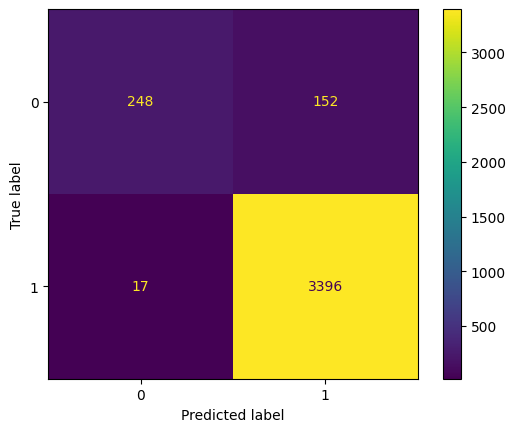

In [ ]:
con_mat=confusion_matrix(y_test,y_pred_knn)
report=classification_report(y_test,y_pred_knn)
print("Confusion Matrix for the KNN Model :\n",con_mat)
print()
print("Classification report for the KNN Model :\n",report)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)
plt.show()

Navie Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train_tfidf.toarray(),y_train)

GaussianNB()

In [ ]:
y_pred_nb=nb_model.predict(X_test_tfidf.toarray())
print(y_pred_nb.shape)
print(y_test.shape)
y_train_pred_nb=nb_model.predict(X_train_tfidf.toarray())
nb_score = accuracy_score(y_test, y_pred_nb)
nb_train_score = accuracy_score(y_train, y_train_pred_nb)

print("Test Accuracy for Naive Bayes Model :", nb_score)
print("Train Accuracy for Naive Bayes Model :", nb_train_score)

(3813,)
(3813,)
Test Accuracy for Naive Bayes Model : 0.44584316810910046
Train Accuracy for Naive Bayes Model : 0.4978031346317791


Accuracy Score for Naive Bayes Model : 0.44584316810910046
Confusion Matrix for the Naive Bayes Model :
 [[ 364   36]
 [2077 1336]]

Classification report for the Naive Bayes Model :
               precision    recall  f1-score   support

           0       0.15      0.91      0.26       400
           1       0.97      0.39      0.56      3413

    accuracy                           0.45      3813
   macro avg       0.56      0.65      0.41      3813
weighted avg       0.89      0.45      0.53      3813




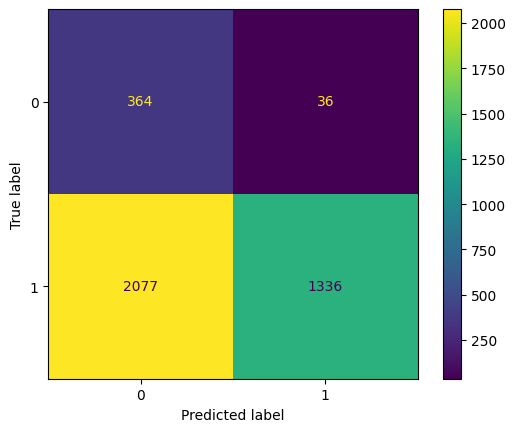

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
con_mat=confusion_matrix(y_test,y_pred_nb)
report=classification_report(y_test,y_pred_nb)
nb_score=accuracy_score(y_test,y_pred_nb)
print("Accuracy Score for Naive Bayes Model :",nb_score)
print("Confusion Matrix for the Naive Bayes Model :\n",con_mat)
print()
print("Classification report for the Naive Bayes Model :\n",report)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)
plt.show()

Decsion tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=dt_model.predict(X_test_tfidf)
y_train_pred_dt=dt_model.predict(X_train_tfidf)

print(y_pred_dt.shape)
print(y_test.shape)
dt_score = accuracy_score(y_test, y_pred_dt)
dt_train_score = accuracy_score(y_train, y_train_pred_dt)

print("Test Accuracy for Decision Tree Model :", dt_score)
print("Train Accuracy for Decision Tree Model :", dt_train_score)

(3813,)
(3813,)
Test Accuracy for Decision Tree Model : 0.9530553370049829
Train Accuracy for Decision Tree Model : 0.995868581546331


Accuracy Score for DecisionTree Model : 0.9530553370049829
Confusion Matrix for the DecisionTree Model :
 [[ 291  109]
 [  70 3343]]

Classification report for the DecisionTree Model :
               precision    recall  f1-score   support

           0       0.81      0.73      0.76       400
           1       0.97      0.98      0.97      3413

    accuracy                           0.95      3813
   macro avg       0.89      0.85      0.87      3813
weighted avg       0.95      0.95      0.95      3813




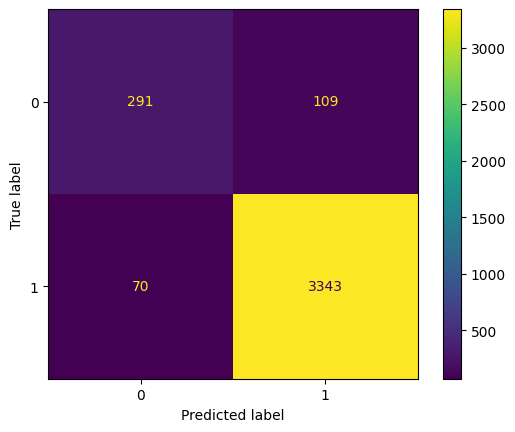

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
con_mat=confusion_matrix(y_test,y_pred_dt)
report=classification_report(y_test,y_pred_dt)
dt_score=accuracy_score(y_test,y_pred_dt)
print("Accuracy Score for DecisionTree Model :",dt_score)
print("Confusion Matrix for the DecisionTree Model :\n",con_mat)
print()
print("Classification report for the DecisionTree Model :\n",report)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.show()

4.logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train_tfidf,y_train)

LogisticRegression()

(3813,)
(3813,)
Test Accuracy for Logistic Regression Model : 0.962496721741411
Train Accuracy for Logistic Regression Model : 0.9687192602793626
Confusion Matrix for the Logistic Regression Model :
 [[ 274  126]
 [  17 3396]]

Classification report for the Logistic Regression Model :
               precision    recall  f1-score   support

           0       0.94      0.69      0.79       400
           1       0.96      1.00      0.98      3413

    accuracy                           0.96      3813
   macro avg       0.95      0.84      0.89      3813
weighted avg       0.96      0.96      0.96      3813




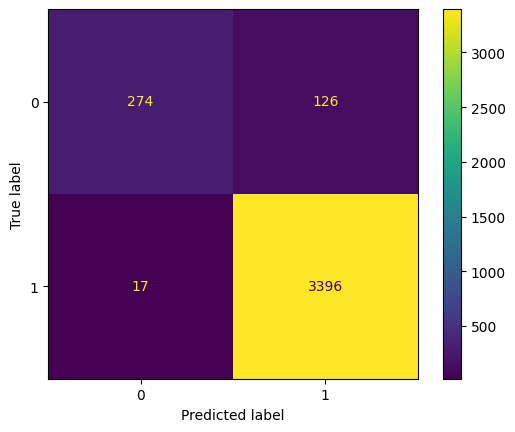

In [ ]:
y_pred_lr=lr_model.predict(X_test_tfidf)
y_train_pred_lr=lr_model.predict(X_train_tfidf)

print(y_pred_lr.shape)
print(y_test.shape)
lr_score = accuracy_score(y_test, y_pred_lr)
lr_train_score = accuracy_score(y_train, y_train_pred_lr)

print("Test Accuracy for Logistic Regression Model :", lr_score)
print("Train Accuracy for Logistic Regression Model :", lr_train_score)

con_mat=confusion_matrix(y_test,y_pred_lr)
report=classification_report(y_test,y_pred_lr)
print("Confusion Matrix for the Logistic Regression Model :\n",con_mat)
print()
print("Classification report for the Logistic Regression Model :\n",report)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.show()

In [ ]:
import pickle
with open("lr_model.pkl","wb") as f:
  pickle.dump(lr_model,f)

5.support Vector machine**

In [ ]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train_tfidf,y_train)

SVC()

(3813,)
(15249,)
(3813,)
Test Accuracy for Support Vector Classifier Model : 0.964594807238395
Train Accuracy for Support Vector Classifier Model : 0.9858351367302775
Confusion Matrix for the Logistic Regression Model :
 [[ 285  115]
 [  20 3393]]

Classification report for the Logistic Regression Model :
               precision    recall  f1-score   support

           0       0.93      0.71      0.81       400
           1       0.97      0.99      0.98      3413

    accuracy                           0.96      3813
   macro avg       0.95      0.85      0.89      3813
weighted avg       0.96      0.96      0.96      3813




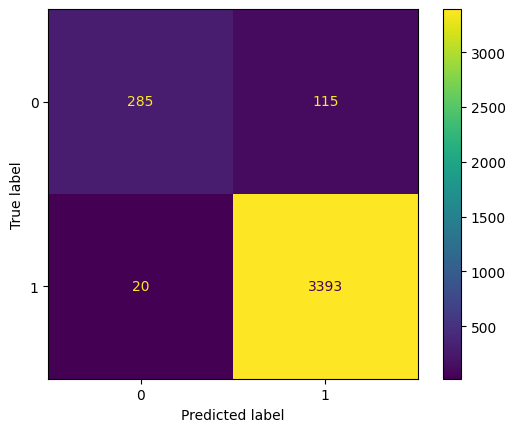

In [ ]:
y_pred_svc=svc_model.predict(X_test_tfidf)
print(y_pred_svc.shape)
y_train_pred_svc=svc_model.predict(X_train_tfidf)
print(y_train_pred_svc.shape)
print(y_test.shape)
svc_score = accuracy_score(y_test, y_pred_svc)
svc_train_score = accuracy_score(y_train, y_train_pred_svc)

print("Test Accuracy for Support Vector Classifier Model :", svc_score)
print("Train Accuracy for Support Vector Classifier Model :", svc_train_score)
con_mat=confusion_matrix(y_test,y_pred_svc)
report=classification_report(y_test,y_pred_svc)
print("Confusion Matrix for the Logistic Regression Model :\n",con_mat)
print()
print("Classification report for the Logistic Regression Model :\n",report)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc)
plt.show()

6.Bagging**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train_tfidf,y_train)

RandomForestClassifier()

(3813,)
(15249,)
(3813,)
Test Accuracy for Random Forest Ensembles Model : 0.9619722003671649
Train Accuracy for Random Forest Ensembles Model : 0.995868581546331
Confusion Matrix for the Logistic Regression Model :
 [[ 278  122]
 [  23 3390]]

Classification report for the Logistic Regression Model :
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       400
           1       0.97      0.99      0.98      3413

    accuracy                           0.96      3813
   macro avg       0.94      0.84      0.89      3813
weighted avg       0.96      0.96      0.96      3813




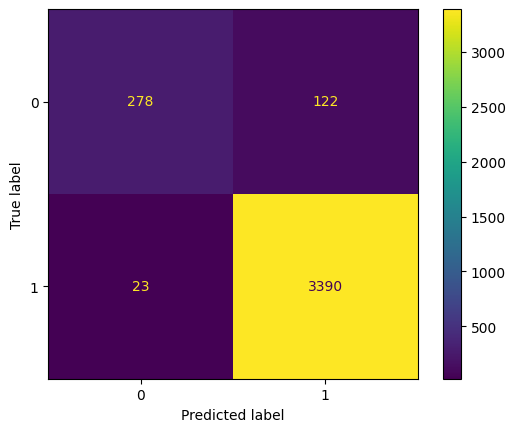

In [ ]:
y_pred_rfc=rfc_model.predict(X_test_tfidf)
print(y_pred_rfc.shape)
y_train_pred_rfc=rfc_model.predict(X_train_tfidf)
print(y_train_pred_rfc.shape)
print(y_test.shape)
rfc_score = accuracy_score(y_test, y_pred_rfc)
rfc_train_score = accuracy_score(y_train, y_train_pred_rfc)

print("Test Accuracy for Random Forest Ensembles Model :", rfc_score)
print("Train Accuracy for Random Forest Ensembles Model :", rfc_train_score)
con_mat=confusion_matrix(y_test,y_pred_rfc)
report=classification_report(y_test,y_pred_rfc)
print("Confusion Matrix for the Logistic Regression Model :\n",con_mat)
print()
print("Classification report for the Logistic Regression Model :\n",report)
print()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc)
plt.show()

7.Xgboost**

In [ ]:
# Classification
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb_model=xgb.XGBClassifier(
    objective='multi:softprob', # for multiclass classification
    eval_metric='mlogloss',
    use_label_encoder=False, # Re-adding this for compatibility, although less critical with pre-encoded labels
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    num_class=len(le.classes_) # Explicitly setting num_class
)

# Train the model
xgb_model.fit(X_train_tfidf,y_train_encoded)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:11:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=2, ...)

(3813, 2)
(15249, 2)
(3813,)
Test Accuracy for XGBoost Ensembles Model : 0.9598741148701809
Train Accuracy for XGBoost Ensembles Model : 0.9705554462587711
Confusion Matrix for the Logistic Regression Model :
 [[ 263  137]
 [  16 3397]]

Classification report for the Logistic Regression Model :
               precision    recall  f1-score   support

           0       0.94      0.66      0.77       400
           1       0.96      1.00      0.98      3413

    accuracy                           0.96      3813
   macro avg       0.95      0.83      0.88      3813
weighted avg       0.96      0.96      0.96      3813




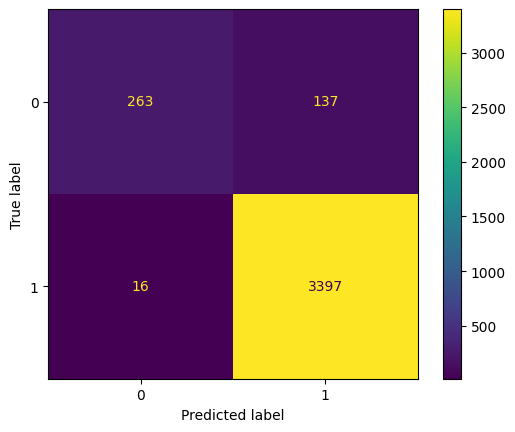

In [ ]:
y_pred_xgb=xgb_model.predict(X_test_tfidf)
print(y_pred_xgb.shape)
y_train_pred_xgb=xgb_model.predict(X_train_tfidf)
print(y_train_pred_xgb.shape)
print(y_test.shape)

# Convert probabilities to class labels
y_pred_xgb_labels = np.argmax(y_pred_xgb, axis=1)
y_train_pred_xgb_labels = np.argmax(y_train_pred_xgb, axis=1)

xgb_score = accuracy_score(y_test_encoded, y_pred_xgb_labels)
xgb_train_score = accuracy_score(y_train_encoded, y_train_pred_xgb_labels)

print("Test Accuracy for XGBoost Ensembles Model :", xgb_score)
print("Train Accuracy for XGBoost Ensembles Model :", xgb_train_score)
con_mat=confusion_matrix(y_test_encoded,y_pred_xgb_labels)
report=classification_report(y_test_encoded,y_pred_xgb_labels)
print("Confusion Matrix for the Logistic Regression Model :\n",con_mat)
print()
print("Classification report for the Logistic Regression Model :\n",report)
print()
ConfusionMatrixDisplay.from_predictions(y_test_encoded,y_pred_xgb_labels)
plt.show()

In [ ]:
# Comparision of Evaluation scores
score={
    "Model":["KNN Classficartion","Naive Bayes","Decision Tree Classification","Logistic Regression","Support Vector Classifier(Kernal='rbf')","Random Forest Classifier","XGBoosting"],
    "Accuracy Test score":[knn_score,nb_score,dt_score,lr_score,svc_score,rfc_score,xgb_score],
    "Accuracy Train score":[knn_train_score,nb_train_score,dt_train_score,lr_train_score,svc_train_score,rfc_train_score,xgb_train_score]

}
df_score=pd.DataFrame(score)
df_score

,Model,Accuracy Test score,Accuracy Train score
0,KNN Classficartion,0.955678,0.964850
1,Naive Bayes,0.445843,0.497803
2,Decision Tree Classification,0.953055,0.995869
3,Logistic Regression,0.962497,0.968719
4,Support Vector Classifier(Kernal='rbf'),0.964595,0.985835
5,Random Forest Classifier,0.961972,0.995869
6,XGBoosting,0.959874,0.970555
